In [14]:
from pulp import*
import matplotlib.pyplot as plt
import numpy as np
# Solve the problem using CBC with messages disabled to suppress solver output
solver = PULP_CBC_CMD(msg=False)

# I - Chris Vacation

In [15]:
# Create a 2D list of variables with weight and price
items = [
    {"name": "A", "weight": 5, "price": 10},
    {"name": "B", "weight": 7, "price": 8},
    {"name": "C", "weight": 4, "price": 12},
    {"name": "D", "weight": 3, "price": 4},
    {"name": "E", "weight": 5, "price": 5},
    {"name": "F", "weight": 3, "price": 10},
    {"name": "G", "weight": 4, "price": 6},
    {"name": "H", "weight": 6, "price": 9},
    {"name": "I", "weight": 4, "price": 7},
    {"name": "J", "weight": 6, "price": 9}
]

weight_values = [20, 25, 26]

# Add constraint: total weight of selected items cannot exceed 25
# Create pulp variables for each item (binary: 0 or 1)
for capacity in weight_values:
    # Create a fresh problem and variables for each capacity to avoid accumulating constraints
    chris_probleme = LpProblem(f"Chris_Problem_capacity_{capacity}", LpMaximize)
    item_vars = [LpVariable(item["name"], cat="Binary") for item in items]

    total_weight = lpSum(item["weight"] * var for item, var in zip(items, item_vars))
    chris_probleme += total_weight <= capacity

    # Objective: maximize total price of selected items
    total_price = lpSum(item["price"] * var for item, var in zip(items, item_vars))
    chris_probleme += total_price

    chris_probleme.solve(solver)
    print("Status:", LpStatus[chris_probleme.status])

    print(f"Capacity: {capacity}")
    print("Total price:", value(total_price))
    print("Total weight:", value(total_weight))
    print("")

Status: Optimal
Capacity: 20
Total price: 45.0
Total weight: 20.0

Status: Optimal
Capacity: 25
Total price: 52.0
Total weight: 25.0

Status: Optimal
Capacity: 26
Total price: 54.0
Total weight: 26.0



# II - How to visit Paris ?


### Problem data

In [16]:
# Define site labels
sites = ["TE", "ML", "AT", "MO", "JT", "CA", "CP", "CN", "BS", "SC", "PC", "TM", "AC"]

# Durations in hours
duration = np.array([4.5, 3, 1, 2, 1.5, 2, 2.5, 2, 2, 1.5, 0.75, 2, 1.5])

# Appreciations with stars from 0 to 5
appreciations = np.array([5, 4, 3, 2, 3, 3, 1, 5, 3, 1, 3, 0, 5])

# Prices in euros
price = np.array([16.5, 14.0, 10.5, 11.0, 0.0, 10.0, 10.0, 7.0, 10.0, 8.5, 0.0, 12.0, 0.0])

# Combine into a structured NumPy array
data = np.core.records.fromarrays(
    [sites, duration, appreciations, price],
    names="Site,Duration,Appreciations,Price"
)

# Define the distance (time) matrix
dist_ut = np.array([
    [0.0, 3.8, 2.1, 2.4, 3.5, 4.2, 5.0, 4.4, 5.5, 4.2, 2.5, 3.1, 1.9],
    [0.0, 0.0, 3.8, 1.1, 1.3, 3.3, 1.3, 1.1, 3.4, 0.8, 1.7, 2.5, 2.8],
    [0.0, 0.0, 0.0, 3.1, 3.0, 5.8, 4.8, 4.9, 4.3, 4.6, 2.2, 4.4, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.9, 3.1, 2.5, 2.0, 3.9, 1.8, 1.0, 2.3, 2.1],
    [0.0, 0.0, 0.0, 0.0, 0.0, 4.2, 2.0, 2.4, 2.7, 2.0, 1.0, 3.4, 2.1],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.5, 2.7, 6.5, 2.6, 3.8, 1.3, 4.9],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.85, 3.7, 0.9, 2.7, 3.4, 3.8],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.5, 0.4, 2.8, 2.7, 3.9],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.2, 3.3, 5.7, 3.8],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 2.6, 3.6],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.2],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
])

n = len(sites)

print("Durations:", duration)
print("Appreciations:", appreciations)
print("Prices:", price)


Durations: [4.5  3.   1.   2.   1.5  2.   2.5  2.   2.   1.5  0.75 2.   1.5 ]
Appreciations: [5 4 3 2 3 3 1 5 3 1 3 0 5]
Prices: [16.5 14.  10.5 11.   0.  10.  10.   7.  10.   8.5  0.  12.   0. ]


C:\Users\Samue\AppData\Local\Temp\ipykernel_16260\196932615.py:14: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.records.
  data = np.core.records.fromarrays(


### Adding a dummy depot (D) in the routing model

- Single connected tour: With arc variables and “one in/one out” constraints, the model could create several small cycles. Adding a depot and using MTZ constraints forces all visited nodes into one connected tour passing through D.

- Open route made easy: If returning to the start is not desire, adding D (zero time, zero travel), the solver builds a cycle D → … → D that corresponds to an open route over real sites, without extra time cost.

- Simpler constraints: Degree + MTZ constraints stay simple; no need for custom “one start/one end” flow constraints.

In [19]:
# symmetric travel times (keep diagonals at 0)
travel = dist_ut + dist_ut.T
np.fill_diagonal(travel, 0.0)

# add a dummy depot D (node index n) with zero duration and zero travel to/from all nodes
sites_ext = sites + ["D"]
travel_ext = np.zeros((n+1, n+1))
travel_ext[:n, :n] = travel
duration_ext = np.append(duration, 0.0)
appreciations_ext = np.append(appreciations, 0.0)
price_ext = np.append(price, 0.0)

print("Travel times:\n", travel_ext)



Travel times:
 [[0.   3.8  2.1  2.4  3.5  4.2  5.   4.4  5.5  4.2  2.5  3.1  1.9  0.  ]
 [3.8  0.   3.8  1.1  1.3  3.3  1.3  1.1  3.4  0.8  1.7  2.5  2.8  0.  ]
 [2.1  3.8  0.   3.1  3.   5.8  4.8  4.9  4.3  4.6  2.2  4.4  1.   0.  ]
 [2.4  1.1  3.1  0.   0.9  3.1  2.5  2.   3.9  1.8  1.   2.3  2.1  0.  ]
 [3.5  1.3  3.   0.9  0.   4.2  2.   2.4  2.7  2.   1.   3.4  2.1  0.  ]
 [4.2  3.3  5.8  3.1  4.2  0.   3.5  2.7  6.5  2.6  3.8  1.3  4.9  0.  ]
 [5.   1.3  4.8  2.5  2.   3.5  0.   0.85 3.7  0.9  2.7  3.4  3.8  0.  ]
 [4.4  1.1  4.9  2.   2.4  2.7  0.85 0.   4.5  0.4  2.8  2.7  3.9  0.  ]
 [5.5  3.4  4.3  3.9  2.7  6.5  3.7  4.5  0.   4.2  3.3  5.7  3.8  0.  ]
 [4.2  0.8  4.6  1.8  2.   2.6  0.9  0.4  4.2  0.   2.5  2.6  3.6  0.  ]
 [2.5  1.7  2.2  1.   1.   3.8  2.7  2.8  3.3  2.5  0.   3.   1.2  0.  ]
 [3.1  2.5  4.4  2.3  3.4  1.3  3.4  2.7  5.7  2.6  3.   0.   2.1  0.  ]
 [1.9  2.8  1.   2.1  2.1  4.9  3.8  3.9  3.8  3.6  1.2  2.1  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.  

### ListVisit1

The code below doesn't take the price and the appreciation into a count

In [20]:
#----------- MODEL -----------#
capacity = 8.0  # total available time (hours)
solver = PULP_CBC_CMD(msg=False)

m = LpProblem(f"ListVisit1{capacity}", LpMaximize)

N = n + 1  # include depot

# visit variables (including depot)
x = {i: LpVariable(f"x_{i}", lowBound=0, upBound=1, cat="Binary") for i in range(N)}
# arcs (i -> j), i != j
y = {(i, j): LpVariable(f"y_{i}_{j}", 0, 1, cat="Binary")
     for i in range(N) for j in range(N) if i != j}
# MTZ order variables (for subtour elimination) - continuous order variables
# We'll anchor the depot (index n) to 0 and link u to x so that u is meaningful only when a node is visited
u = {i: LpVariable(f"u_{i}", lowBound=0, upBound=N-1) for i in range(N)}

# Objective: maximize the number of real sites visited (exclude depot)
m += lpSum(x[i] for i in range(n)), "Maximize_visited_sites"

# Force depot present in the tour
m += x[n] == 1, "Depot_is_visited"

# Degree constraints
for i in range(N):
    m += lpSum(y[i, j] for j in range(N) if j != i) == x[i], f"out_degree_{i}"
    m += lpSum(y[j, i] for j in range(N) if j != i) == x[i], f"in_degree_{i}"

# MTZ subtour elimination: enforce consecutive ordering among visited nodes
# Anchor depot (last index = n) to 0
m += u[n] == 0, "u_depot_fixed"
# Link u to x: if a node is not visited (x=0) then u must be 0; if visited u in [1..N-1]
for i in range(N):
    if i != n:
        m += u[i] >= x[i], f"u_lower_{i}"
        m += u[i] <= (N-1) * x[i], f"u_upper_{i}"
# Apply MTZ only for non-depot node pairs: this prevents subtours among visited nodes
for i in range(N):
    for j in range(N):
        if i != j and i != n and j != n:
            # Standard MTZ: u_i - u_j + (N-1)*y_ij <= N-2
            m += u[i] - u[j] + (N-1) * y[(i, j)] <= (N-2), f"mtz_{i}_{j}"

# Time budget: visit durations (exclude depot) + travel times (including edges to/from depot)
visit_time = lpSum(duration_ext[i] * x[i] for i in range(N))  # depot adds 0 anyway
travel_time = lpSum(travel_ext[i, j] * y[(i, j)]
                    for i in range(N) for j in range(N) if i != j)

m += visit_time + travel_time <= capacity, "Time_budget"

# ----------- SOLVING -----------#
m.solve(solver)
print("Status:", LpStatus[m.status])

chosen = [sites_ext[i] for i in range(N) if value(x[i]) > 0.5]
arcs = [(sites_ext[i], sites_ext[j]) for i in range(N) for j in range(N)
        if i != j and value(y[(i, j)]) > 0.5]

print("Visited:", [s for s in chosen if s != "D"])
print("Arcs (route):", arcs)
print("Total visited:", sum(value(x[i]) for i in range(n)))
print("Total time:", value(visit_time + travel_time))
print("  Visit time:", value(visit_time), " Travel time:", value(travel_time))


Status: Optimal
Visited: ['AT', 'JT', 'PC', 'AC']
Arcs (route): [('AT', 'AC'), ('JT', 'D'), ('PC', 'JT'), ('AC', 'PC'), ('D', 'AT')]
Total visited: 4.0
Total time: 7.95
  Visit time: 4.75  Travel time: 3.2


### Visualization
Because this is not directly inside the question I massively used LLM to create the visusalization.

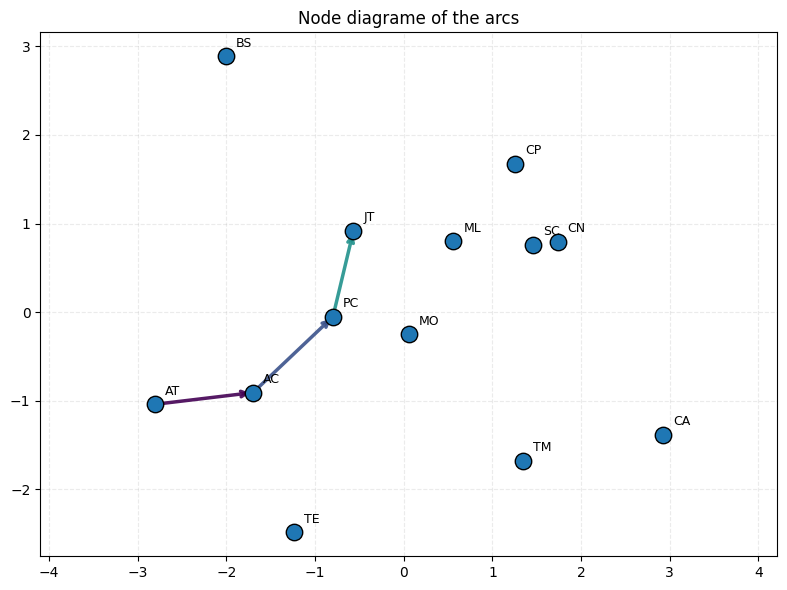

In [21]:
def show_route(arcs=arcs):
    # --- Visualization: embed nodes in 2D preserving travel times (classical MDS) ---
    dummy_alpha = 0  # transparency for depot node

    # travel_ext should be defined earlier in the notebook (n+1 x n+1 matrix)
    D = np.array(travel_ext, dtype=float)
    # Replace any non-finite or extremely large distances by a large finite number
    mask_bad = ~np.isfinite(D)
    if mask_bad.any():
        D[mask_bad] = np.nanmax(D[np.isfinite(D)]) * 1.5

    # Classical MDS (double centering) to get 2D coordinates
    def classical_mds(distance_matrix, k=2):
        n = distance_matrix.shape[0]
        # squared distances
        D2 = distance_matrix ** 2
        J = np.eye(n) - np.ones((n, n)) / n
        B = -0.5 * J.dot(D2).dot(J)
        # eigen decomposition
        eigvals, eigvecs = np.linalg.eigh(B)
        # sort descending
        idx = np.argsort(eigvals)[::-1]
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:, idx]
        # take positive components only
        L = np.diag(np.sqrt(np.clip(eigvals[:k], a_min=0, a_max=None)))
        V = eigvecs[:, :k]
        X = V.dot(L)
        return X

    coords = classical_mds(D, k=2)

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))

    # Determine labels and index mapping (site label -> index)
    labels = sites_ext if 'sites_ext' in globals() else [str(i) for i in range(D.shape[0])]
    label_to_idx = {lab: idx for idx, lab in enumerate(labels)}

    # If arcs (route) exists use it; otherwise fall back to all-pairs
    use_arcs = 'arcs' in globals() and isinstance(arcs, (list, tuple)) and len(arcs) > 0
    if use_arcs:
        # Try to order arcs into a path. arcs is list of (from_label, to_label) pairs
        # Build adjacency mapping
        nxt = {a: b for a, b in arcs}
        # find start: node that is not any 'to' (if cycle, start as depot if present)
        tos = {b for a, b in arcs}
        starts = [a for a, b in arcs if a not in tos]
        if len(starts) > 0:
            start = starts[0]
        else:
            start = arcs[0][0]
        # follow chain
        ordered = []
        cur = start
        seen = set()
        while True:
            if cur in nxt and (cur, nxt[cur]) not in ordered:
                ordered.append((cur, nxt[cur]))
                seen.add(cur)
                cur = nxt[cur]
                if cur == start:
                    break
            else:
                break

        route_arcs = ordered if len(ordered) > 0 else list(arcs)

        # Create a colormap gradient from start to end
        import matplotlib.colors as mcolors
        cmap = plt.get_cmap('viridis')
        m = len(route_arcs)
        colors = [cmap(i/(m-1)) if m>1 else cmap(0.5) for i in range(m)]

        # Draw arrows with gradient; depot (label 'D') should be transparent
        depot_label = 'D'
        for idx, (a, b) in enumerate(route_arcs):
            if a not in label_to_idx or b not in label_to_idx:
                continue
            i = label_to_idx[a]
            j = label_to_idx[b]
            xi, yi = coords[i]
            xj, yj = coords[j]
            col = colors[idx]
            alpha = 0.9
            # If either endpoint is depot, make translucent
            if a == depot_label or b == depot_label:
                alpha = dummy_alpha
            rgba = (*col[:3], alpha)
            ax.annotate('', xy=(xj, yj), xytext=(xi, yi), arrowprops=dict(arrowstyle='->', color=rgba, lw=2.5), zorder=2)
    else:
        # Draw thin gray background edges for reference if no arcs
        maxd = np.nanmax(D[np.isfinite(D)])
        min_nonzero = np.nanmin(D[(D>0) & np.isfinite(D)]) if np.any((D>0)&np.isfinite(D)) else 1.0
        for i in range(D.shape[0]):
            for j in range(i+1, D.shape[0]):
                if not np.isfinite(D[i,j]):
                    continue
                xi, yi = coords[i]
                xj, yj = coords[j]
                dist = D[i,j]
                alpha = 1.0 - (dist - min_nonzero) / (maxd - min_nonzero + 1e-9)
                ax.plot([xi, xj], [yi, yj], color='gray', alpha=max(0.05, alpha*0.5), linewidth=0.6, zorder=1)

    # Draw nodes on top
    xs = coords[:,0]
    ys = coords[:,1]

    # Render depot with 80% transparency
    depot_label = 'D'
    node_alphas = [dummy_alpha if lab==depot_label else 1.0 for lab in labels]
    for xi, yi, lab, a in zip(xs, ys, labels, node_alphas):
        ax.scatter([xi], [yi], s=140, c='tab:blue', edgecolors='k', alpha=a, zorder=3)

    # Annotate labels (slightly offset)
    for i, lab in enumerate(labels):
        ax.text(xs[i]+0.02*(xs.max()-xs.min()), ys[i]+0.02*(ys.max()-ys.min()), lab, fontsize=9, zorder=4, alpha=(dummy_alpha if lab==depot_label else 1.0))

    ax.set_title('Node diagrame of the arcs')
    ax.set_aspect('equal', adjustable='datalim')
    ax.grid(True, linestyle='--', alpha=0.25)
    plt.tight_layout()
    plt.show()


show_route(arcs)

Status: Optimal
Visited: ['AT', 'JT', 'CN', 'SC', 'PC', 'AC']
Arcs (route): [('AT', 'D'), ('JT', 'PC'), ('CN', 'SC'), ('SC', 'JT'), ('PC', 'AC'), ('AC', 'AT'), ('D', 'CN')]
Total visited: 6.0
Total time: 13.85
  Visit time: 8.25  Travel time: 5.6
Total appreciation: 20.0
Total price (€): 26.0


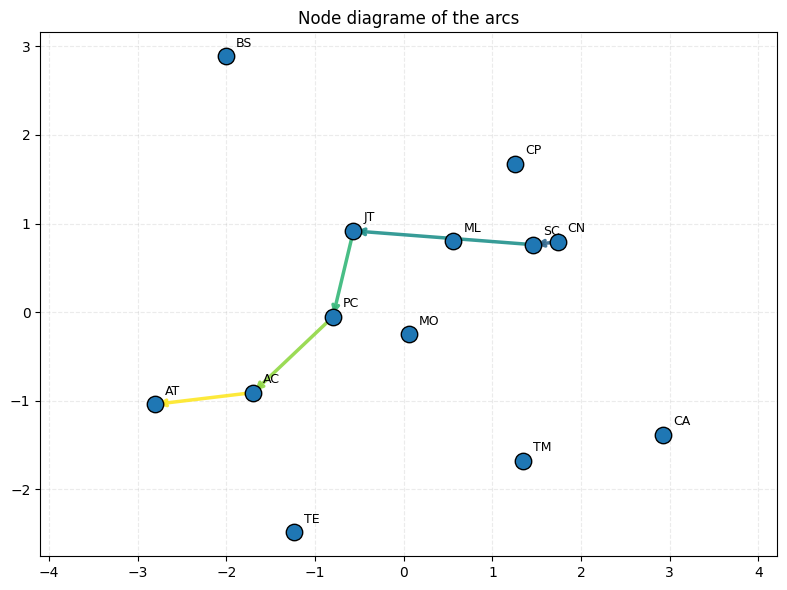

In [ ]:
# ----- params you already have -----
capacity = 14.0  # total available time (hours)
price_limit = 70.0  # set your budget here

N = n + 1  # include depot

# visit variables (including depot)
x = {i: LpVariable(f"x_{i}", lowBound=0, upBound=1, cat="Binary") for i in range(N)}
# arcs (i -> j), i != j
y = {(i, j): LpVariable(f"y_{i}_{j}", 0, 1, cat="Binary")
     for i in range(N) for j in range(N) if i != j}
# MTZ
u = {i: LpVariable(f"u_{i}", lowBound=0, upBound=N-1) for i in range(N)}

m = LpProblem(f"ListVisit2{capacity}", LpMaximize)

# ----- NEW BUDGET CONSTRAINT -----
m += lpSum(price_ext[i] * x[i] for i in range(N)) <= price_limit, "Budget_limit"

# ----- NEW OBJECTIVE: maximize appreciation (+ tiny tie-break on #sites) -----
epsilon = 1e-3
m += (
    lpSum(appreciations_ext[i] * x[i] for i in range(N))
    + epsilon * lpSum(x[i] for i in range(n))
), "Maximize_appreciation"

# Force depot present in the tour
m += x[n] == 1, "Depot_is_visited"

# Degree constraints
for i in range(N):
    m += lpSum(y[i, j] for j in range(N) if j != i) == x[i], f"out_degree_{i}"
    m += lpSum(y[j, i] for j in range(N) if j != i) == x[i], f"in_degree_{i}"

# MTZ subtour elimination
m += u[n] == 0, "u_depot_fixed"
for i in range(N):
    if i != n:
        m += u[i] >= x[i], f"u_lower_{i}"
        m += u[i] <= (N-1) * x[i], f"u_upper_{i}"
for i in range(N):
    for j in range(N):
        if i != j and i != n and j != n:
            m += u[i] - u[j] + (N-1) * y[(i, j)] <= (N-2), f"mtz_{i}_{j}"

# Time budget
visit_time = lpSum(duration_ext[i] * x[i] for i in range(N))
travel_time = lpSum(travel_ext[i, j] * y[(i, j)] for i in range(N) for j in range(N) if i != j)
m += visit_time + travel_time <= capacity, "Time_budget"



# ----------- SOLVING -----------#
m.solve(solver)
print("Status:", LpStatus[m.status])

chosen = [sites_ext[i] for i in range(N) if value(x[i]) > 0.5]
arcs = [(sites_ext[i], sites_ext[j]) for i in range(N) for j in range(N)
        if i != j and value(y[(i, j)]) > 0.5]

print("Visited:", [s for s in chosen if s != "D"])
print("Arcs (route):", arcs)
print("Total visited:", sum(value(x[i]) for i in range(n)))
print("Total time:", value(visit_time + travel_time))
print("  Visit time:", value(visit_time), " Travel time:", value(travel_time))

# ----- NEW REPORTS -----
total_appreciation = lpSum(appreciations_ext[i] * x[i] for i in range(N))
total_price = lpSum(price_ext[i] * x[i] for i in range(N))
print("Total appreciation:", value(total_appreciation))
print("Total price (€):", value(total_price))

show_route(arcs)
